1. Data Collection / Data Gathering
2. Data Preprocessing
3. Training and Testing
4. Model Selction
5. Accuracy Check:
    1. Confusion Matrix
    2. Classification Report

In [46]:
# import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Problem Statement: 1. To predict people are survived or not

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
df.shape

(891, 9)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

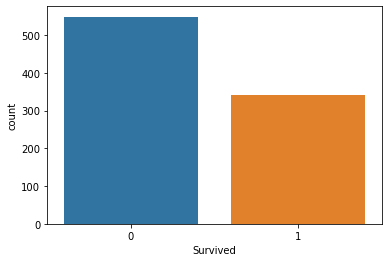

In [10]:
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

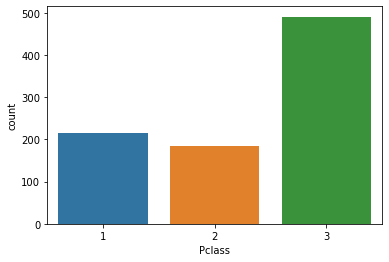

In [11]:
sns.countplot(x='Pclass', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

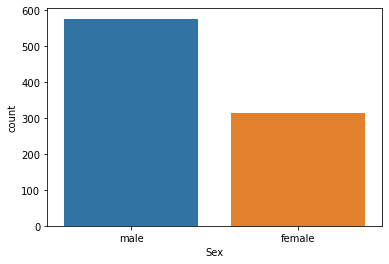

In [12]:
sns.countplot(x='Sex', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

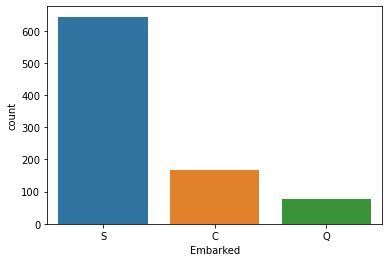

In [13]:
sns.countplot(x='Embarked', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

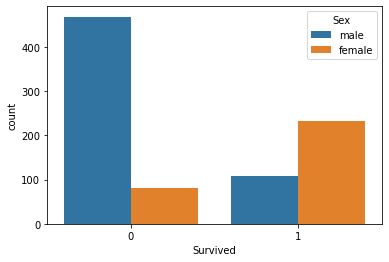

In [14]:
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

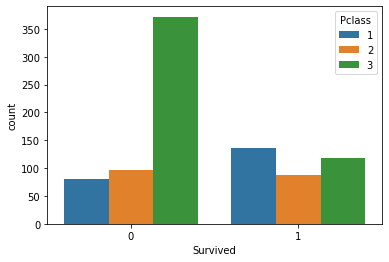

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

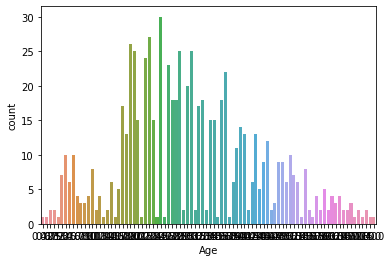

In [16]:
sns.countplot(x='Age', data=df)

<AxesSubplot:ylabel='Frequency'>

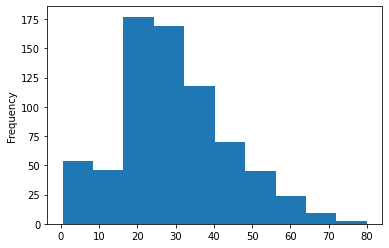

In [17]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

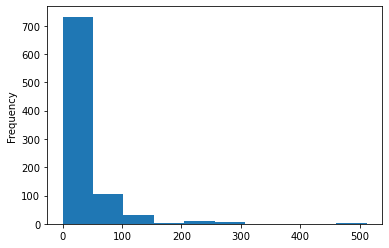

In [18]:
df['Fare'].plot.hist()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

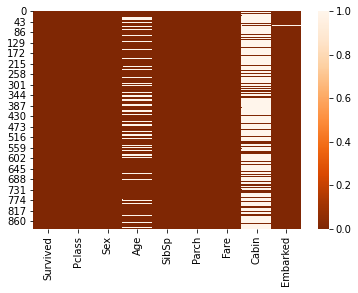

In [22]:
sns.heatmap(df.isnull(), cmap='Oranges_r')

In [23]:
df = df.drop('Cabin', axis=1)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

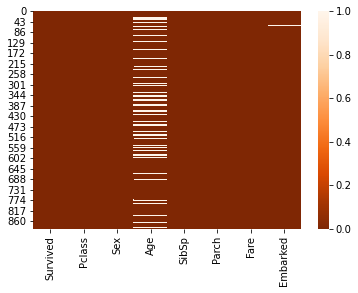

In [25]:
sns.heatmap(df.isnull(), cmap='Oranges_r')

In [26]:
df.dropna(inplace=True)

<AxesSubplot:>

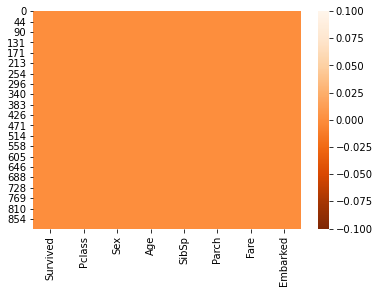

In [27]:
sns.heatmap(df.isnull(), cmap='Oranges_r')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [29]:
df['Sex'].count()

712

In [30]:
# Replace Method
Gender = pd.get_dummies(df['Sex'], drop_first=True)

In [31]:
Gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [32]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [33]:
df = pd.concat([df, Gender, Embarked], axis =1)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [35]:
df.drop(['Sex','Embarked'],axis=1, inplace=True)

In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   male      712 non-null    uint8  
 7   Q         712 non-null    uint8  
 8   S         712 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB


In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [39]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.536762,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.150826,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.099037,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.106296,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.249543,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.182457,-0.062346,-0.250994
male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,1.000000,-0.027256,0.109078
Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,-0.062346,-0.027256,1.000000,-0.378859
S,-0.159015,0.197831,-0.025431,0.018968,0.013259,-0.250994,0.109078,-0.378859,1.000000


In [40]:
# Training and Testing

In [41]:
x = df.drop('Survived', axis=1)

In [42]:
y = df['Survived']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=False)

In [121]:
y_test

423    0
178    0
305    1
292    0
592    0
      ..
850    0
703    0
124    0
471    0
615    1
Name: Survived, Length: 143, dtype: int64

In [122]:
log_model = LogisticRegression()

In [123]:
log_model.fit(x_train, y_train)

C:\Users\shyam.DESKTOP-3EM50G2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predict = log_model.predict(x_test)

In [125]:
print(predict[0:5])

[0 0 1 0 0]


In [126]:
y_test.head()

423    0
178    0
305    1
292    0
592    0
Name: Survived, dtype: int64

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [128]:
print(confusion_matrix(y_test, predict))

[[74  8]
 [18 43]]


In [129]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.84      0.70      0.77        61

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



In [130]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [131]:
accuracy_score(y_test, predict) * 100

81.81818181818183

In [132]:
mean_squared_error(y_test, predict) * 100

18.181818181818183

In [133]:
81.81818181818183 + 18.181818181818183

100.00000000000001

In [134]:
# TP =74  
# FP = 8
# FN = 18 
# TN = 43
 
accuracy  = 74 + 43 / 74 + 8 + 43 + 18
print(accuracy)

143.5810810810811


In [135]:
117 / 143 * 100

81.81818181818183

# Precision
precision = TP / TP + FP
# Recall 
recall = TP / TP + FN
# F1-SCORE
F1_SCORE = 2 / 1/precision + 1/ recall

In [136]:
precision = 74 / 82 

In [137]:
precision

0.9024390243902439

In [138]:
1/ 0.90

1.1111111111111112

In [139]:
1 / 0.80

1.25

In [140]:
1.1111111111111112 +1.25

2.361111111111111

In [141]:
2 / 2.361111111111111

0.8470588235294118

# AUC -ROC CURVE

In [142]:
y_predict = log_model.predict(x_test)
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [143]:
y_pred_prob = log_model.predict_proba(x_test)
y_pred_prob1 = y_pred_prob[:,1]

In [144]:
y_test[0:10]

423    0
178    0
305    1
292    0
592    0
595    0
472    1
54     0
456    0
111    0
Name: Survived, dtype: int64

In [145]:
y_pred_prob[0:10]

array([[0.53001797, 0.46998203],
       [0.7437882 , 0.2562118 ],
       [0.26440478, 0.73559522],
       [0.70829554, 0.29170446],
       [0.94569218, 0.05430782],
       [0.94387073, 0.05612927],
       [0.31407503, 0.68592497],
       [0.69985766, 0.30014234],
       [0.78550448, 0.21449552],
       [0.295646  , 0.704354  ]])

In [146]:
y_predict[0:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [147]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob1)

In [148]:
print("False Positive Rate: ", fpr)
print("True Positive Rate: ", tpr)
print("Threshold is : ", threshold)

False Positive Rate:  [0.         0.01219512 0.01219512 0.02439024 0.02439024 0.04878049
 0.04878049 0.06097561 0.06097561 0.07317073 0.07317073 0.08536585
 0.08536585 0.09756098 0.09756098 0.1097561  0.1097561  0.14634146
 0.14634146 0.17073171 0.17073171 0.18292683 0.18292683 0.29268293
 0.29268293 0.31707317 0.31707317 0.35365854 0.41463415 0.43902439
 0.52439024 0.52439024 0.76829268 0.76829268 1.        ]
True Positive Rate:  [0.         0.         0.27868852 0.27868852 0.44262295 0.44262295
 0.49180328 0.49180328 0.57377049 0.57377049 0.67213115 0.67213115
 0.70491803 0.70491803 0.72131148 0.72131148 0.7704918  0.7704918
 0.78688525 0.78688525 0.83606557 0.83606557 0.85245902 0.85245902
 0.8852459  0.8852459  0.90163934 0.90163934 0.90163934 0.91803279
 0.91803279 0.95081967 0.95081967 1.         1.        ]
Threshold is :  [1.9674229  0.9674229  0.83561758 0.82921006 0.75681984 0.73926168
 0.72149171 0.704354   0.63496528 0.63226035 0.57599763 0.56924102
 0.54675808 0.50663505 0

In [149]:
roc_auc_score(y_test, y_pred_prob1)

0.8776489404238305

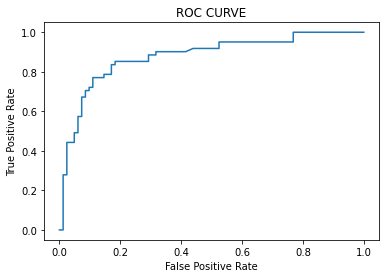

In [150]:
plt.title("ROC CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

1. TPR - RECALL - SENSITIVITY
2. SPECIFICITY
3. FPR = 1 - SPECIFICITY 